In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import math
from sklearn import tree
import matplotlib.pyplot as plt

 1. Read the data first and look at the first 5 rows. Check if there are any missing values or not (3 points)

In [16]:
df = pd.read_csv('lab3_dataset.csv')
print(df.head())

print('Is there null values: ', df.isnull().values.any())

   age  likes_dog  likes_gravity  going_to_be_an_astronaut
0   24          0              0                         0
1   30          1              1                         1
2   36          0              1                         1
3   36          0              0                         0
4   42          0              0                         0
Is there null values:  False


 2. Split the data using sklearn's train_test_split(X, y, test_size) function. This function takes in your features (X), the target variable (y), and
 the test_size you'd like. We will train our model on the training set and then use the test set to evaluate the model for different criterions.
 Use 20% of the data as test size. Use random state=5. Use all the predictors as features to predict the target variable (going to be an
 astronaut). (5 points)

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop('going_to_be_an_astronaut', axis=1).values
y = df['going_to_be_an_astronaut']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)

3. Now use the gini criterion to fit the data to the training set. Continue with random state=5, with max_depth=4. Then predict on the testing
 set. (5 points)

In [18]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini', random_state=5, max_depth=4)

clf_gini.fit(X_train, y_train)

y_pred_gini = clf_gini.predict(X_test)

 4. Evaluate the accuracy, precision and recall for the model. Explain the findings. (10 points)

In [19]:
from sklearn.metrics import accuracy_score, classification_report

print('accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))
print('recall score: {0:0.4f}'.format(recall_score(y_test, y_pred_gini)))
print('Precision score: {0:0.4f}'.format(precision_score(y_test, y_pred_gini)))

accuracy score: 0.5714
recall score: 0.5714
Precision score: 1.0000


Accuracy means it's only correct 57% of the time when it predict.
Recall tells us that it only predict 57% correctly out of all actual positive.
It has a 100% precision score, which mean it is 100% correct when it predict "yes".

5. Now use the Entropy criterion to fit the data to the training set. Continue with random state=5, with max_depth=5. Then predict on the
 testing set. (2 points)

In [20]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=5, max_depth=5)
clf_entropy.fit(X_train, y_train)

y_pred_entropy = clf_entropy.predict(X_test)

6. Evaluate the accuracy, precision and recall for the model. Explain the findings. (10 points)

In [21]:
print('accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_entropy)))
print('recall score: {0:0.4f}'.format(recall_score(y_test, y_pred_entropy)))
print('Precision score: {0:0.4f}'.format(precision_score(y_test, y_pred_entropy)))

accuracy score: 0.2857
recall score: 0.2857
Precision score: 1.0000


Accuracy means it's only correct 28% of the time when it predict.
Recall tells us that it only predict 28% correctly out of all actual positive.
It has a 100% precision score, which mean it is 100% correct when it predict "yes".

7. Which criteria gives the highest accuracy,precision and recall? Explain why that might be the case. (5 points)

Gini gives the highest accuracy, recall. Precision score are the same for both of them. The higher depth in Gini prevent overfitting and focus on generalizable splits, which explain its higher accuracy and recall.The dataset also has simpler features and target, making Gini find optimal splits efficiently.

 8. Plot the tree for both the gini and entropy function Use class_names 'No' and 'Yes'. (5 points)

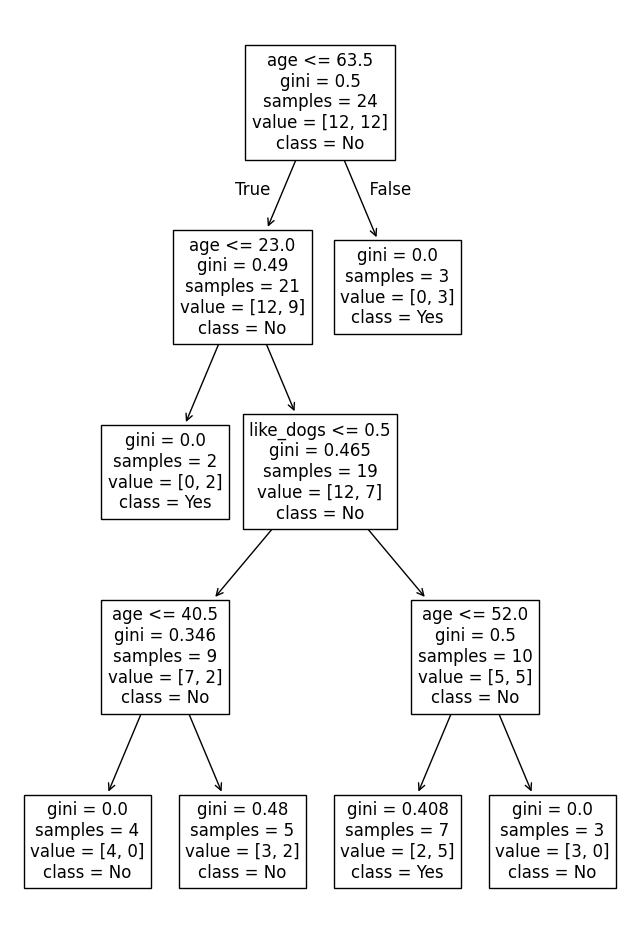

In [22]:
plt.figure(figsize=(8,12))
tree.plot_tree(clf_gini, feature_names=['age', 'like_dogs', 'likes_gravity'], class_names=['No', 'Yes'])
plt.show()

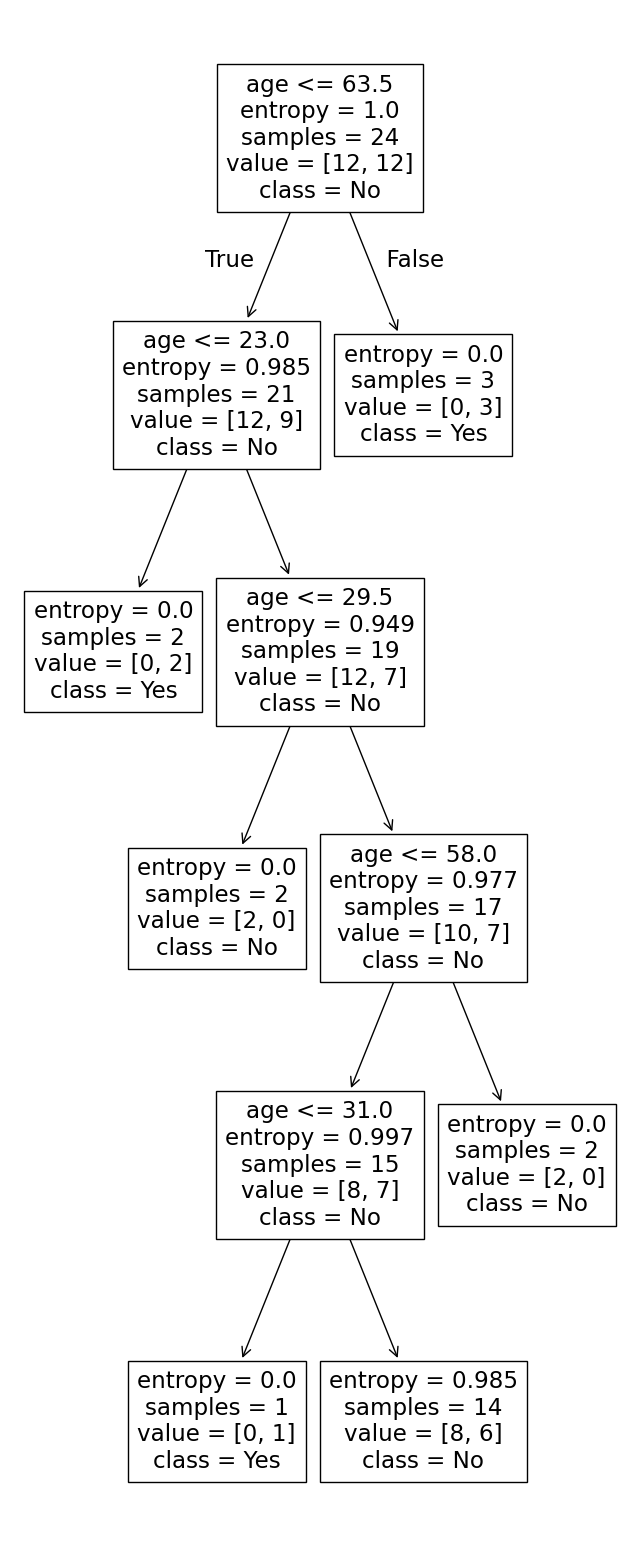

In [23]:
plt.figure(figsize=(8,20))
tree.plot_tree(clf_entropy, feature_names=['age', 'like_dogs', 'likes_gravity'], class_names=['No', 'Yes'])
plt.show()

 9. Using the model which gives the highest accuracy: Given an individual of age 33, and that they like dogs but do not love gravity, will they
 become an astronaut or not? (10 points)

In [24]:
sample_1 = [[33, 1, 0]]

print(clf_gini.predict(sample_1))
print('they will become astronaunt')

[1]
they will become astronaunt


10. Find the best max_depth (from 1 to 21) in Decision Tree for entopy and Gini. If both depths are different, explain why. (10 points)

In [25]:
best_depth_gini = 0
best_accuracy_gini = 0

best_depth_entropy = 0
best_accuracy_entropy = 0

for i in range(1,22):
    gini = DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=5)
    gini.fit(X_train, y_train)
    gini_accuracy = accuracy_score(y_test, gini.predict(X_test))
    if gini_accuracy > best_accuracy_gini:
        best_depth_gini = i
        best_accuracy_gini = gini_accuracy
    

for i in range(1,22):
    entropy = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=5)
    entropy.fit(X_train, y_train)
    entropy_accuracy = accuracy_score(y_test, entropy.predict(X_test))
    if entropy_accuracy > best_accuracy_entropy:
        best_depth_entropy = i
        best_accuracy_entropy = entropy_accuracy

print(f"Gini Best Depth: {best_depth_gini}, Accuracy: {best_accuracy_gini}")
print(f"Entropy Best Depth: {best_depth_entropy}, Accuracy: {best_accuracy_entropy}")

Gini Best Depth: 4, Accuracy: 0.5714285714285714
Entropy Best Depth: 6, Accuracy: 0.42857142857142855


 11. Calculate the root's entropy. Hint: look at the example in lecture slides. (10 points)

In [26]:
def entropy(p):
    if p == 0 or p == 1:
        return 0
    return -p * math.log2(p) - (1 - p) * math.log2(1 - p)

p_astronaut = sum(y == 1) / len(y)
root_entropy = entropy(p_astronaut)
print(f"\nRoot Entropy: {root_entropy}")


Root Entropy: 0.9629004147713269


12. Split based on likes_dog and going_to_be_an_astronaut. Hint: You can use a pivot table. Look at the slides in lecture (5 points).

In [27]:
pivot_table = pd.pivot_table(df, values='age', index=['likes_dog'], columns=['going_to_be_an_astronaut'], aggfunc='count')
print("\nPivot Table:")
print(pivot_table)


Pivot Table:
going_to_be_an_astronaut  0   1
likes_dog                      
0                         7   7
1                         5  12


13. Calculate the entropy for liking dogs vs not liking dogs. Then find the Information Gain. Explain your findings (20 points).

In [28]:
total_count = len(y)
likes_dog_count = sum(df['likes_dog'] == 1)
not_likes_dog_count = total_count - likes_dog_count

likes_dog_astronaut_prob = pivot_table.iloc[1, 1] / pivot_table.iloc[1].sum() if pivot_table.iloc[1].sum() > 0 else 0
likes_dog_not_astronaut_prob = pivot_table.iloc[1, 0] / pivot_table.iloc[1].sum() if pivot_table.iloc[1].sum() > 0 else 0
entropy_likes_dog = entropy(likes_dog_astronaut_prob)

not_likes_dog_astronaut_prob = pivot_table.iloc[0, 1] / pivot_table.iloc[0].sum() if pivot_table.iloc[0].sum() > 0 else 0
not_likes_dog_not_astronaut_prob = pivot_table.iloc[0, 0] / pivot_table.iloc[0].sum() if pivot_table.iloc[0].sum() > 0 else 0
entropy_not_likes_dog = entropy(not_likes_dog_astronaut_prob)

information_gain_likes_dog = root_entropy - (likes_dog_count / total_count) * entropy_likes_dog - (not_likes_dog_count / total_count) * entropy_not_likes_dog

print(f"\nEntropy for liking dogs: {entropy_likes_dog}")
print(f"Entropy for not liking dogs: {entropy_not_likes_dog}")
print(f"Information Gain for likes_dog: {information_gain_likes_dog}")


Entropy for liking dogs: 0.8739810481273578
Entropy for not liking dogs: 1.0
Information Gain for likes_dog: 0.032007581927292084


Low information gain of 0.03 tells us that "likes_dog" is not a strong predictor if a person if going to be an astronaunt or not. We should use better feature with higher information gain to split the decision tree.